<h2><a href="https://leetcode.com/problems/number-of-enclaves/">1020. Number of Enclaves</a></h2><h3>Medium</h3><hr><p>You are given an <code>m x n</code> binary matrix <code>grid</code>, where <code>0</code> represents a sea cell and <code>1</code> represents a land cell.</p>

<p>A <strong>move</strong> consists of walking from one land cell to another adjacent (<strong>4-directionally</strong>) land cell or walking off the boundary of the <code>grid</code>.</p>

<p>Return <em>the number of land cells in</em> <code>grid</code> <em>for which we cannot walk off the boundary of the grid in any number of <strong>moves</strong></em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/02/18/enclaves1.jpg" style="width: 333px; height: 333px;" />
<pre>
<strong>Input:</strong> grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
<strong>Output:</strong> 3
<strong>Explanation:</strong> There are three 1s that are enclosed by 0s, and one 1 that is not enclosed because its on the boundary.
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/02/18/enclaves2.jpg" style="width: 333px; height: 333px;" />
<pre>
<strong>Input:</strong> grid = [[0,1,1,0],[0,0,1,0],[0,0,1,0],[0,0,0,0]]
<strong>Output:</strong> 0
<strong>Explanation:</strong> All 1s are either on the boundary or can reach the boundary.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == grid.length</code></li>
	<li><code>n == grid[i].length</code></li>
	<li><code>1 &lt;= m, n &lt;= 500</code></li>
	<li><code>grid[i][j]</code> is either <code>0</code> or <code>1</code>.</li>
</ul>


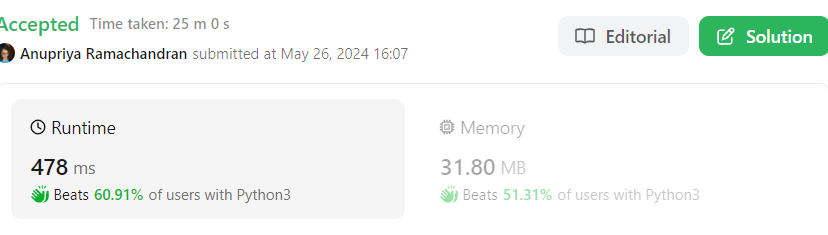

In [2]:
from typing import List
# Same stratgey as previous  130. Surrounded Regions¶
class Solution:
    def numEnclaves(self, grid: List[List[int]]) -> int:

        visit = [[0 for _ in range(len(grid[0]))] for _ in range(len(grid))]
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        rows, cols = len(grid), len(grid[0])

        def dfs(grid, x, y, visit):
            visit[x][y] = 1

            for dx, dy in directions:
                if 0 <= x + dx < len(grid) and 0 <= y + dy <len(grid[0]) and visit[x+dx][y+dy] == 0 and grid[x + dx][y + dy] == 1:
                    dfs(grid, x+dx, y+dy, visit)



        # Scan the border 1s and mark as visited along with its dfs path
        for i in range(len(grid[0])):
            if grid[0][i] == 1:
                dfs(grid, 0, i, visit)

            if grid[rows-1][i] == 1:
                dfs(grid, rows-1, i, visit)


        for i in range(len(grid)):
            if grid[i][0] == 1:
                dfs(grid, i, 0, visit)

            if grid[i][cols -1] == 1:
                dfs(grid, i, cols-1, visit)


        # Scan the Matrix and take count of all UNVISITED 1s
        count = 0
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1 and visit[i][j] == 0:
                    count += 1

        return count